In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv(r'/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **EDA**

> # 1. **average age of diabetes and non diabetes patient**

In [6]:
age_data = pd.DataFrame(df1.groupby('Outcome')['Age'].mean())

In [7]:
age_data

,Age
Outcome,
0,31.190000
1,37.067164


<Axes: xlabel='Outcome', ylabel='Age'>

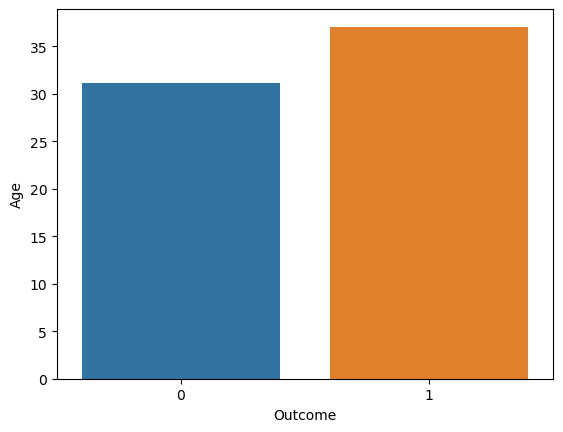

In [8]:
sns.barplot(age_data , x = age_data.index , y= 'Age')

> *   **outcome from above graph is diabetes patient is more from higher age**

> # 2. **avg no. of pregnancies for a women who have diabetes and who have not diabetes**

In [9]:
avg_data = pd.DataFrame(df1.groupby('Outcome')['Pregnancies'].mean())

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

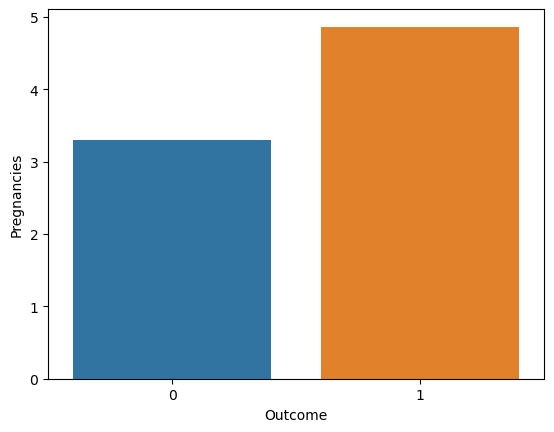

In [10]:
sns.barplot(avg_data , x = avg_data.index , y = 'Pregnancies')

> *    **women having higher pregnancy tends to having more diabetes**

> # 3. **avg bmi for diabetes and non diabetes patient**

In [11]:
bmi_data = pd.DataFrame(df1.groupby('Outcome')['BMI'].mean())

<Axes: xlabel='Outcome', ylabel='BMI'>

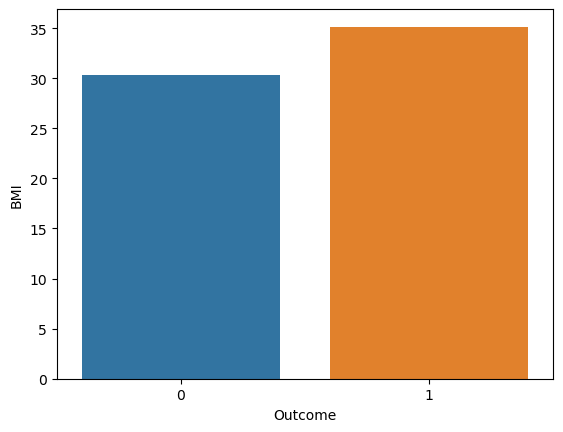

In [12]:
sns.barplot(bmi_data , x = bmi_data.index , y = 'BMI')

> * **patient having higher BMI tends to have more diabetes**

> # 4. **avg SkinThickness for diabetes and non diabetes patient**

In [13]:
SkinThickness_data = pd.DataFrame(df1.groupby('Outcome')['SkinThickness'].mean())

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

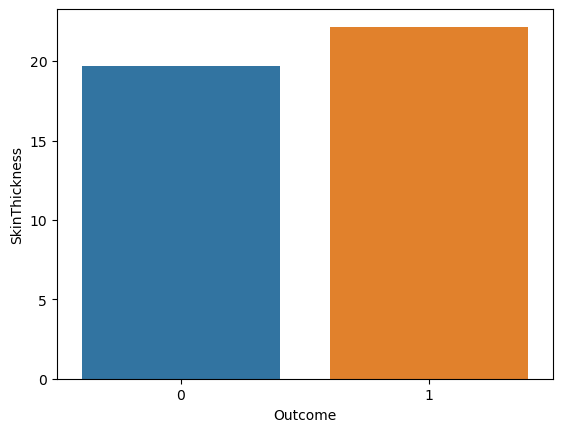

In [14]:
sns.barplot(SkinThickness_data , x = SkinThickness_data.index , y = 'SkinThickness')

> * **patient having more skin thickness have more tendency of diabetes** 

> # 5.  **average insulin dose for diabetes and non diabetes patient**

In [15]:
ins_data = pd.DataFrame(df1.groupby('Outcome')['Insulin'].mean())

<Axes: xlabel='Outcome', ylabel='Insulin'>

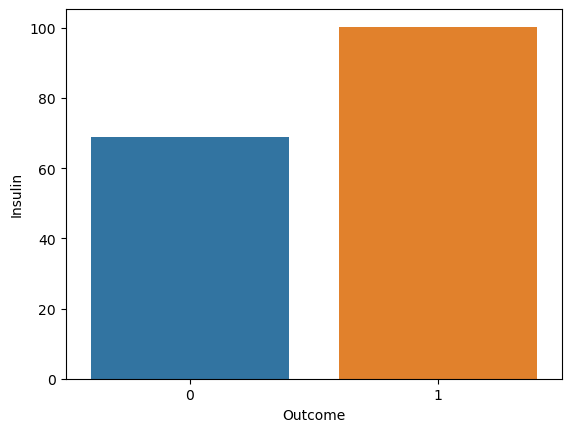

In [16]:
sns.barplot(ins_data , x = ins_data.index , y = 'Insulin')

> * **diabetes patient needs more insulin dose**

> # 6. **average glucose content for a diabetes or non diabetes patient**

In [17]:
glu_data = pd.DataFrame(df1.groupby('Outcome')['Glucose'].mean())

<Axes: xlabel='Outcome', ylabel='Glucose'>

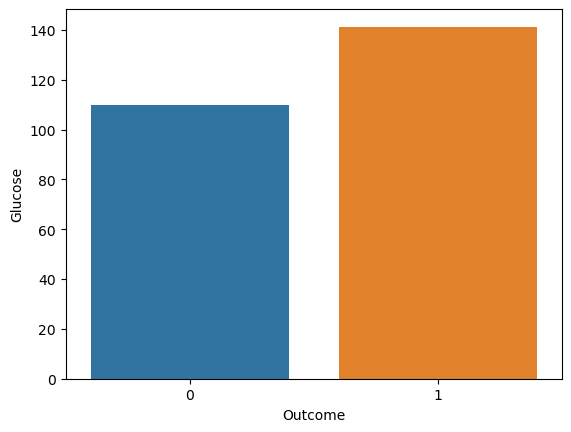

In [18]:
sns.barplot(glu_data , x = glu_data.index , y = 'Glucose')

> * **person having more glucose ontent give more diabetes case**

> # 7. **blood pressure value for diabetes and non diabetes patient**

In [19]:
bp_data = pd.DataFrame(df1.groupby('Outcome')['BloodPressure'].mean())

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

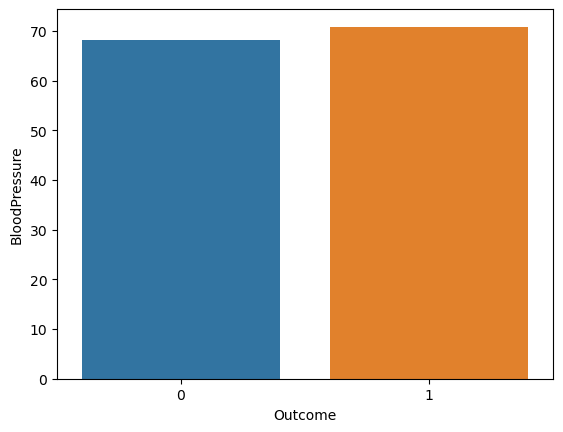

In [20]:
sns.barplot(bp_data , x = bp_data.index , y = 'BloodPressure')

> * **there is not that much difference in diastolic blood pressure for patients**

# **ADAPTIVE BOOSTING MODEL**

> * **divide the model into label and feature** 

In [21]:
X = df1.drop('Outcome',axis = 1)

In [22]:
y = df1['Outcome']

> * **importing different module from library**

In [23]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

> * **model and parameter grid assignment assignment and train test split**

In [24]:
abc = AdaBoostClassifier()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
n_estimators = np.arange(1,100,1)
lr_rate = np.arange(1,25,1)

In [27]:
param_grid = {'n_estimators':n_estimators , 'learning_rate':lr_rate}

> * **cross validation**

In [28]:
grid_model = GridSearchCV(abc , param_grid , verbose = 2 , error_score = 'raise')

> * **fitting and predicting the model**

In [29]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits
[CV] END ....................learning_rate=1, n_estimators=1; total time=   0.0s
[CV] END ....................learning_rate=1, n_estimators=1; total time=   0.0s
[CV] END ....................learning_rate=1, n_estimators=1; total time=   0.0s
[CV] END ....................learning_rate=1, n_estimators=1; total time=   0.0s
[CV] END ....................learning_rate=1, n_estimators=1; total time=   0.0s
[CV] END ....................learning_rate=1, n_estimators=2; total time=   0.0s
[CV] END ....................learning_rate=1, n_estimators=2; total time=   0.0s
[CV] END ....................learning_rate=1, n_estimators=2; total time=   0.0s
[CV] END ....................learning_rate=1, n_estimators=2; total time=   0.0s
[CV] END ....................learning_rate=1, n_estimators=2; total time=   0.0s
[CV] END ....................learning_rate=1, n_estimators=3; total time=   0.0s
[CV] END ....................learning_rate=

GridSearchCV(error_score='raise', estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=2)

In [30]:
y_pred = grid_model.predict(X_test)

> * **metrics import from library**

In [31]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , RocCurveDisplay,classification_report

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       168
           1       0.64      0.64      0.64        86

    accuracy                           0.76       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



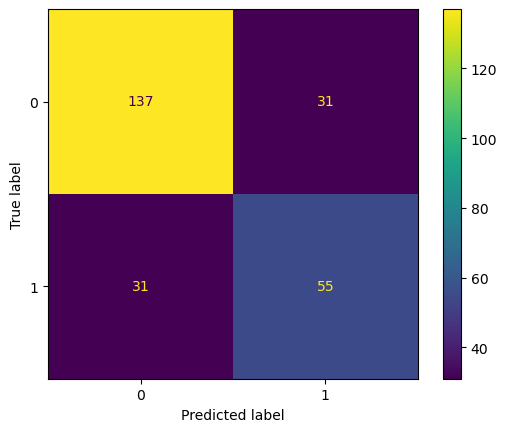

In [33]:
ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test)).plot()

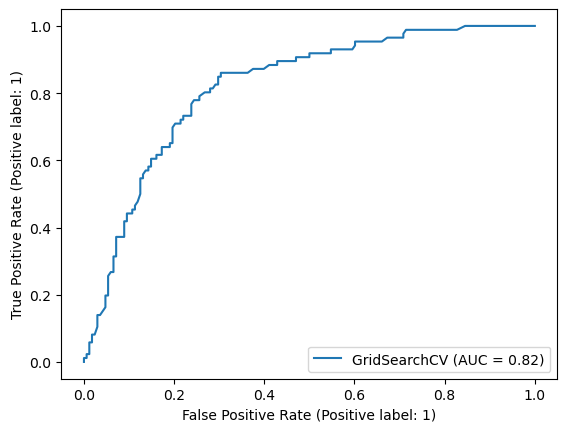

In [34]:
RocCurveDisplay.from_estimator(grid_model,X_test,y_test)